## 데이터 탐색

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../Dataset/titanic.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 변수 타입 변환
df["Survived"] = df["Survived"].astype(str)
df["Pclass"] = df["Pclass"].astype(str)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
grouped = df.groupby("Pclass")
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

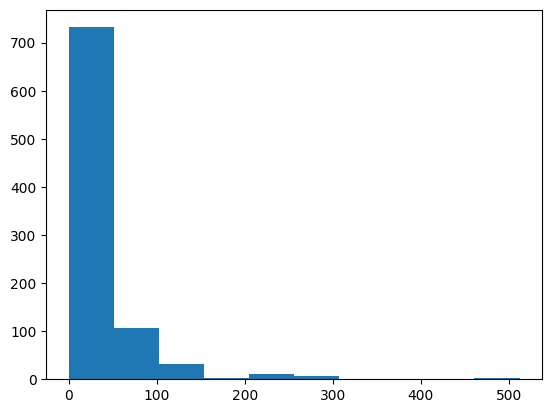

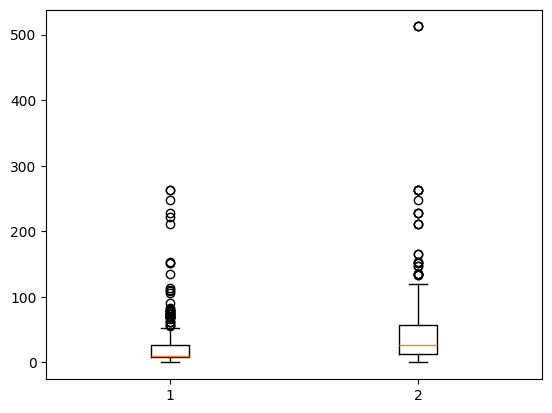

In [20]:
plt.hist(df["Fare"])
plt.show()

data_0 = df[df["Survived"] == "0"]["Fare"]
data_1 = df[df["Survived"] == "1"]["Fare"]
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

In [21]:
grouped = df.groupby("Sex")
print(grouped.size())

data_0 = df[df["Sex"] == "female"]["Survived"]
grouped = pd.DataFrame(data_0).groupby("Survived")
print(grouped.size())

data_1 = df[df["Sex"] == "male"]["Survived"]
grouped = pd.DataFrame(data_1).groupby("Survived")
print(grouped.size())

Sex
female    314
male      577
dtype: int64
Survived
0     81
1    233
dtype: int64
Survived
0    468
1    109
dtype: int64


## 데이터 전처리 개요

In [22]:
meat_consumption_kr = 5 * np.random.randn(1000) + 53.9
meat_consumption_jp = 5 * np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"한국인" : meat_consumption_kr, "일본인" : meat_consumption_jp})
meat_consumption.head(6)

,한국인,일본인
0,51.782101,36.294200
1,49.876536,27.713793
2,55.551898,40.211892
3,52.993941,30.562031
4,49.110692,35.470791
5,64.164663,23.158652


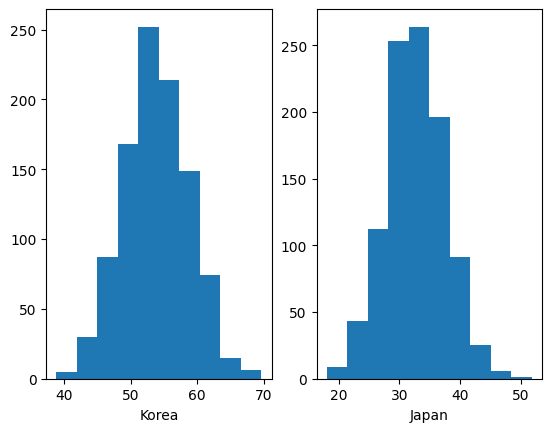

In [27]:
plt.subplot(1, 2, 1)
plt.hist(meat_consumption_kr)
plt.xlabel("Korea")

plt.subplot(1, 2, 2)
plt.hist(meat_consumption_jp)
plt.xlabel("Japan")
plt.show()

### z점수

In [28]:
df1 = pd.read_csv("../Dataset/df_sample.csv")

mid_avg = np.mean(df1["중간"])
mid_std = np.std(df1["중간"])
df1["중간_Z점수"] = (df1["중간"] - mid_avg) / mid_std

df1.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수
0,S01,90,95,20,20,1.231167
1,S02,82,83,18,18,0.436866
2,S03,80,78,18,18,0.238290
3,S04,78,75,10,10,0.039715
4,S05,93,91,12,12,1.529030


### minMax

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["한국인_mm"] = scaler.fit_transform(meat_consumption[["한국인"]])
meat_consumption["일본인_mm"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption[["한국인", "일본인", "한국인_mm", "일본인_mm"]].head()

,한국인,일본인,한국인_mm,일본인_mm
0,51.782101,36.294200,0.420444,0.540742
1,49.876536,27.713793,0.358505,0.286372
2,55.551898,40.211892,0.542978,0.656883
3,52.993941,30.562031,0.459834,0.370809
4,49.110692,35.470791,0.333612,0.516331


### 정규분포 변환

In [34]:
df = pd.read_csv("../Dataset/USJudgeRatings.csv")
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [35]:
import scipy.stats as ss
print(ss.skew(df["CONT"]))
print(ss.skew(df["PHYS"]))

1.0859724796276253
-1.5582154642293153


In [36]:
df["CONT"] = np.log(df["CONT"])
df["PHYS"] = np.log(np.max(df["PHYS"] + 1) - df["PHYS"])

print(ss.skew(df["CONT"]))
print(ss.skew(df["PHYS"]))

0.6555571886692603
0.5824357748750443


### 범주화

In [63]:
data = [["철수", 52], ["영희", 92], ["미영", 84], ["시완", 71], ["미경", 65],
        ["영환", 81], ["숙경", 66], ["부영", 77], ["민섭", 73], ["보연", 74]]

df = pd.DataFrame(data, columns=['이름', '수학점수'])

In [67]:
print(np.mean(df['수학점수']))

73.5


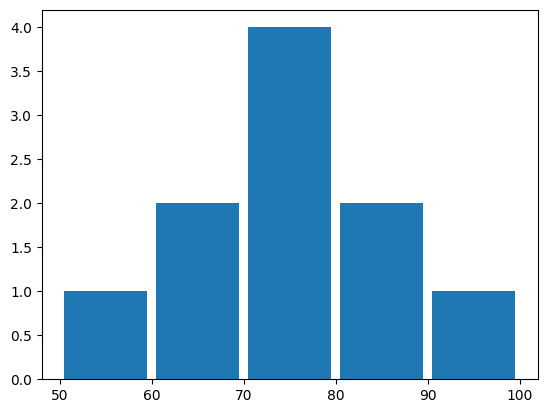

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [66]:
plt.hist(df["수학점수"], bins=5, range=[50, 100], rwidth=0.9)
plt.show()
df

In [71]:
df["등급"] = pd.cut(x = df["수학점수"], bins = [0, 60, 70, 80, 90, 100], 
                  labels = ["F", "D", "C", "B", "A"],
                  include_lowest = True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


### PCA